In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

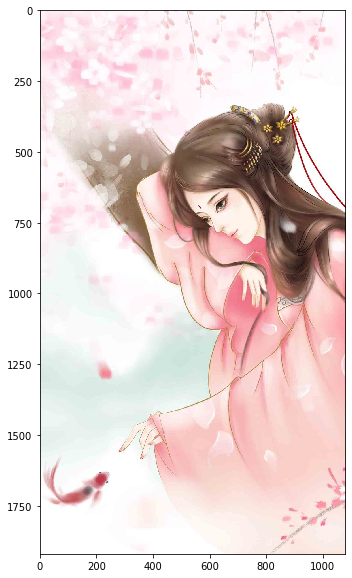

In [2]:
img = cv2.imread('./imgdata/anime.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img)
plt.show()

### 矩

图像的矩可以帮助我们计算图像的质心，面积等。函数cv2.moments()会将计算得到的矩以一个字典的形式返回。

#### cv2.moments(array[, binaryImage])
+ array:轮廓

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
img_cont, contours, structure = cv2.findContours(img_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

cont = contours[487]
moment = cv2.moments(cont)
print(moment)

cx = moment['m10'] / moment['m00']
cy = moment['m01'] / moment['m00']
print('\n', cx, cy)

{'m00': 201892.5, 'm10': 156115853.5, 'm01': 127376893.0, 'm20': 125620877845.41666, 'm11': 100601566885.79166, 'm02': 85274667883.58333, 'm30': 104445600302119.06, 'm21': 82617990590358.4, 'm12': 68805547312806.766, 'm03': 60258761254917.2, 'mu20': 4902378079.286362, 'mu11': 2105821046.4307404, 'mu02': 4910747132.027679, 'mu30': -273933302702.4375, 'mu21': 105261212866.41016, 'mu12': 208677974959.34277, 'mu03': 261219639500.96094, 'nu20': 0.12027252536917395, 'nu11': 0.05166317471512733, 'nu02': 0.12047784758053073, 'nu30': -0.0149569957064842, 'nu21': 0.0057473534373891485, 'nu12': 0.011393998264223952, 'nu03': 0.014262818678564626}

 773.2622732394715 630.9144371385762


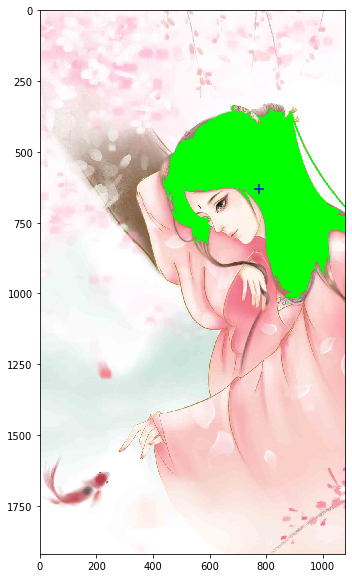

In [4]:
cnt_idx = 487
img1 = img.copy()
img_cnt = cv2.drawContours(img1, contours, cnt_idx, [0, 255, 0], -1)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_cnt)
ax.scatter(x=[cx], y=[cy], marker='+', s=100, c='b')
plt.show()

#### 轮廓面积

#### cv2.contourArea(contour[, oriented])
+ contour:轮廓

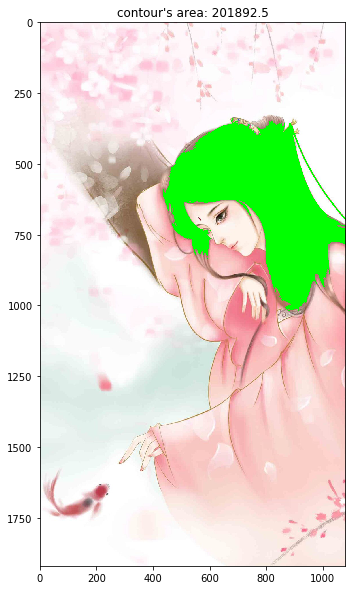

In [5]:
cnt_idx = 487
img2 = img.copy()
img_cnt = cv2.drawContours(img2, contours, cnt_idx, [0, 255, 0], -1)
cnt_area = cv2.contourArea(contours[cnt_idx])

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_cnt)
ax.set_title(f"contour's area: {cnt_area}")
plt.show()

#### 轮廓周长

#### cv2.arcLength(curve, closed)
+ curve: 轮廓
+ closed：是否闭合

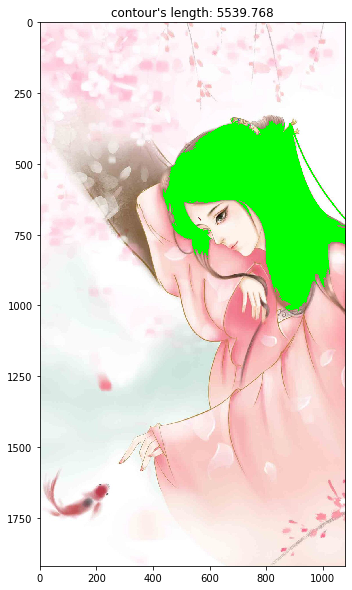

In [6]:
cnt_idx = 487
img3 = img.copy()
img_cnt = cv2.drawContours(img3, contours, cnt_idx, [0, 255, 0], -1)
cnt_length = cv2.arcLength(contours[cnt_idx], True)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_cnt)
ax.set_title(f"contour's length: {cnt_length:.3f}")
plt.show()

#### 轮廓近似

将轮廓近似到一种由更少的点组成的轮廓形状，近似轮廓点的数目有我们设置的准确度参数决定。

#### cv2.approxPolyDP(curve, epsilon, closed[, approxCurve])
+ curve:轮廓
+ epsilon：近似系数
+ closed：返回的轮廓是否闭合

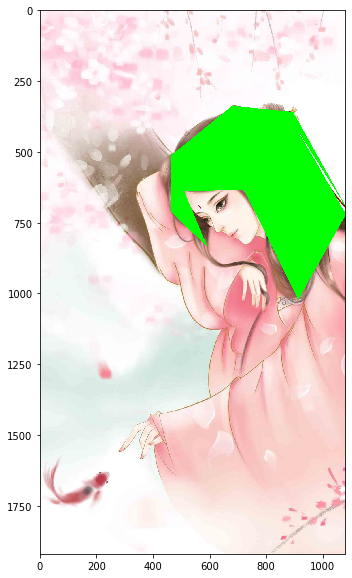

In [7]:
cnt_idx = 487
img4 = img.copy()

epsilon = 0.01 * cv2.arcLength(contours[cnt_idx], True)
contour_approx = cv2.approxPolyDP(contours[cnt_idx], epsilon, True)
contours.append(contour_approx)
img_cnt_ = cv2.drawContours(img4, contours, len(contours)-1, [0, 255, 0], -1)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_cnt_)
plt.show()

#### 凸包

凸包与轮廓近似，但又不完全相同，虽然有些情况下他们给出的结果是一样的。函数cv1.convexHull()可以用来检测一个曲线是否具有凸性缺陷，并能纠正缺陷。一般来说凸性曲线总是凸的，至少是平的，如果曲线有凹进去的地方就被叫做凸性缺陷。


#### cv2.convexHull(points[, hull[, clockwise[, returnPoints]]])
+ points:一个轮廓（cv2.findContours()返回的是轮廓的集合）
+ hull:输出
+ clockwise:方向标志。True，该函数的输出为顺时针方向的，否则为逆时针方向的。
+ returnPoints：默认为True，输出返回的是凸包曲线上的坐标，False，但会的是与凸包点对应的轮廓上的点

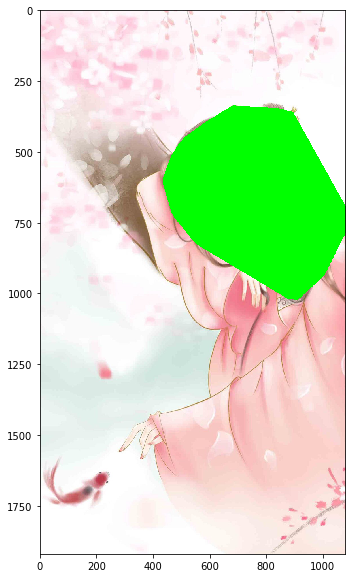

In [8]:
hull = cv2.convexHull(contours[487])
img5 = img.copy()
img_cnt = cv2.drawContours(img4, [hull], 0, [0, 255, 0], -1)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_cnt)
plt.show()

#### 凸性检测

#### cv2.isContourConvex(contour)
+ contour:轮廓

用来检测一个曲线是不是凸的，返回一个bool类型的值。



In [9]:
is_hull = cv2.isContourConvex(contours[487])
print(is_hull)

False


#### 直边界矩形

直边界矩形表示一个没有任何旋转的矩形，即不考虑对象是否旋转。

#### cv2.boundingRect(points)
+ points:

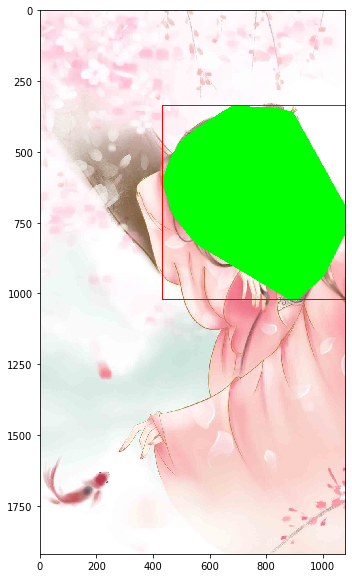

In [10]:
x, y, w, h = cv2.boundingRect(contours[487])
img6 = img.copy()
img_rect = cv2.drawContours(img6, [hull], 0, [0, 255, 0], -1)
img_rect = cv2.rectangle(img6, (x, y), (x+w, y+h), (255, 0, 0), 2)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_rect)
plt.show()

#### 旋转的边界矩形

#### cv2.minAreaRect(points)

这个矩形是面积最小的，它考虑了对象的旋转。该函数返回：
+ (x, y):矩形的[xmin, ymin]
+ (w, h):矩形的[width, height]
+ theta:矩形的旋转角度

#### cv2.boxPoints(box[, points])
cv2.boxPoints()以函数cv2.minAreaRect()的返回值为输入，并返回cv2.minAreaRect()对应矩形的四个顶点坐标
+ box:cv2.minAreaRect()所有的返回值

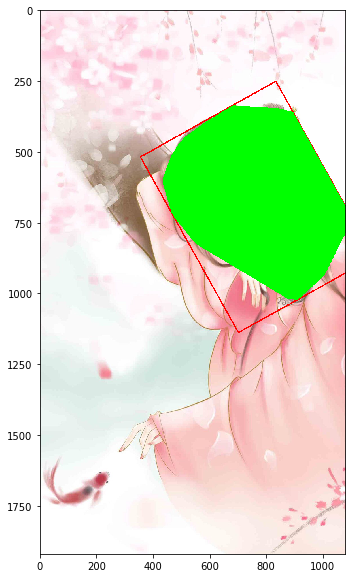

In [11]:
img7 = img.copy()

rect_params = cv2.minAreaRect(contours[487])
rect_rotation = cv2.boxPoints(rect_params)
rect_rotation = [rect_rotation.reshape(rect_rotation.shape[0], 1, -1).astype(np.int32)]
img_rect = cv2.drawContours(img7, rect_rotation, 0, [255, 0, 0], 3)
img_rect = cv2.drawContours(img7, [hull], 0, [0, 255, 0], -1)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_rect)
plt.show()

#### 最小外接圆

#### cv2.minEnclosingCircle()

该函数可以帮我们找到传入对象的一个外切圆，它是所有能够完全包含对象的圆中面积最小的那个。

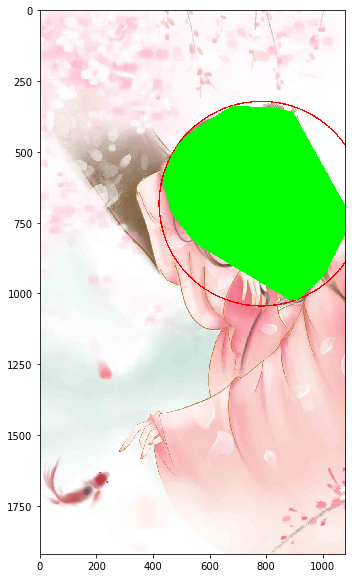

In [12]:
img8 = img.copy()

(ctr_x, ctr_y), radius = cv2.minEnclosingCircle(contours[487])
center, radius = (int(ctr_x), int(ctr_y)), int(radius)
img_circle = cv2.circle(img8, center, radius, [255, 0, 0], 3)
img_circle = cv2.drawContours(img8, [hull], 0, [0, 255, 0], -1)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_circle)
plt.show()

#### 椭圆拟合

#### cv2.fitEllipse(points)

该函数的返回值其实为旋转边界矩形的内切圆
+ points: 轮廓

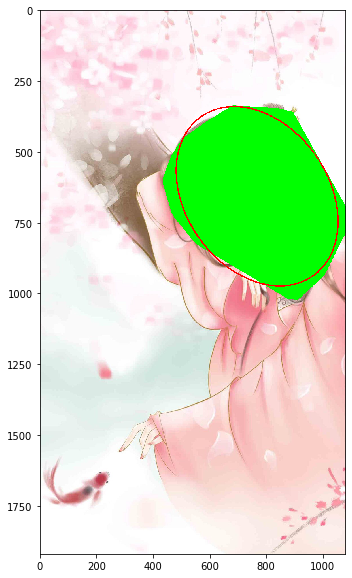

In [13]:
img9 = img.copy()

# 凸包边界
img_ellipse = cv2.drawContours(img9, [hull], 0, [0, 255, 0], -1)

# 拟合椭圆边界
ellipse = cv2.fitEllipse(contours[487])
img_ellipse = cv2.ellipse(img9, ellipse, [255, 0, 0], 3)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_ellipse)
plt.show()

#### 直线拟合

#### cv2.fitLine(points, distType, param, reps, aeps[, line])
+ Inputs：
    + points:
    + distType:距离类型
        + DIST_L1：最小二成距离
        + DIST_L2：一范数
        + DIST_L12
        + DIST_FAIR
        + DIST_WELSCH
        + DIST_HUBER
    + param:距离参数，跟所选的距离类型有关，值可以设置为0，函数本身会自动选择最优化的值
    + reps:径向精度参数[一般设为0.01]
    + aeps:角度精度参数[一般设为0.01]
    + line:
+ Returns：
    + 对于二维直线，输出output为4维，前两维代表拟合出的直线的方向，后两位代表直线上的一点。（即通常说的点斜式直线）

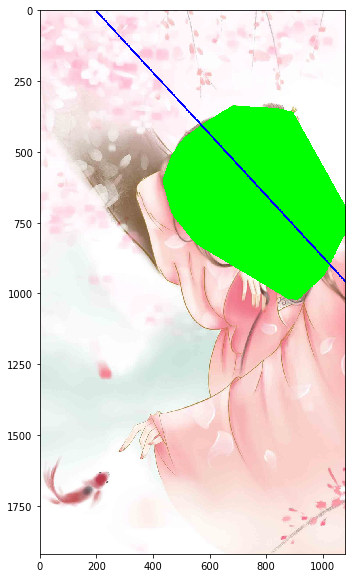

In [14]:
img_ = img.copy()
img_h, img_w = img.shape[:2]
slop_x, slop_y, x, y = cv2.fitLine(contours[487], distType=cv2.DIST_L2, param=0, reps=0.01, aeps=0.01)

# 凸包边界
img_ = cv2.drawContours(img_, [hull], 0, [0, 255, 0], -1)

k = slop_y / slop_x
b = y - k * x
pt1 = (0, b)
pt2 = (img_w, k*img_w+b)
img_line = cv2.line(img_, pt1, pt2, [0, 0, 255], 5)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_)
plt.show()

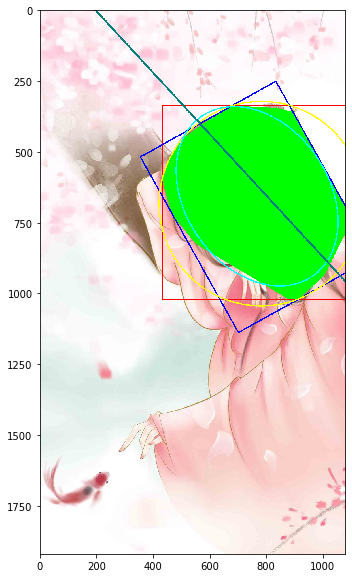

In [15]:
img_10 = img.copy()

# 凸包边界
hull = cv2.convexHull(contours[487])
img5 = img.copy()
img_cnt = cv2.drawContours(img_10, [hull], 0, [0, 255, 0], -1)

# 直矩形边界
x, y, w, h = cv2.boundingRect(contours[487])
img6 = img.copy()
img_rect = cv2.rectangle(img_10, (x, y), (x+w, y+h), (255, 0, 0), 2)

# 旋转矩形边界
rect_params = cv2.minAreaRect(contours[487])
rect_rotation = cv2.boxPoints(rect_params)
rect_rotation = [rect_rotation.reshape(rect_rotation.shape[0], 1, -1).astype(np.int32)]
img_rect = cv2.drawContours(img_10, rect_rotation, 0, [0, 0, 255], 3)

# 外接圆边界
(ctr_x, ctr_y), radius = cv2.minEnclosingCircle(contours[487])
center, radius = (int(ctr_x), int(ctr_y)), int(radius)
img_circle = cv2.circle(img_10, center, radius, [255, 255, 0], 3)

# 椭圆拟合边界
ellipse = cv2.fitEllipse(contours[487])
img_ellipse = cv2.ellipse(img_10, ellipse, [0, 255, 255], 3)

# 直线拟合
slop_x, slop_y, x, y = cv2.fitLine(contours[487], distType=cv2.DIST_L2, param=0, reps=0.01, aeps=0.01)
k = slop_y / slop_x
b = y - k * x
pt1 = (0, b)
pt2 = (img_w, k*img_w+b)
img_line = cv2.line(img_10, pt1, pt2, [0, 125, 125], 5)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_10)
plt.show()

#### 边界矩形的宽高比
$$AspectRatio = \frac{Width}{Height}$$

In [17]:
x, y, w, h = cv2.boundingRect(contours[487])
aspect_ratio = w / h
print(aspect_ratio)

0.9445255474452555


#### 轮廓面积与边界矩形面积的比
$$Extent = \frac{ObjectArea}{BoundingRectangleArea}$$

In [18]:
area = cv2.contourArea(contours[487])
x, y, w, h = cv2.boundingRect(contours[487])
rect_area = w * h
extent = area / rect_area
print(extent)

0.45553875833436747


#### 轮廓面积与凸包面积之比
$$Soliding = \frac{ContourArea}{ConvexHullArea}$$

In [19]:
area = cv2.contourArea(contours[487])
hull = cv2.convexHull(contours[487])
hull_area = cv2.contourArea(hull)
solidity = area / hull_area
print(solidity)

0.668880337533731


#### 与轮廓面积相等的圆的直径
$$EquivalentDiameter = \sqrt{\frac{4\times ContourArea}{\pi}}$$

In [20]:
area = cv2.contourArea(contours[487])
equi_diameter = np.sqrt(4 * area / np.pi)
print(equi_diameter)

507.0083971547649


#### 方向

In [21]:
(x, y), (MA, ma), angle = cv2.fitEllipse(contours[487])
print(angle)

144.546142578125


#### 最大值，最小值，以及它们的位置

In [25]:
img = cv2.cvtColor(img_10.copy(), cv2.COLOR_RGB2GRAY)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img)
print(f'min val: {min_val}')
print(f'max val: {max_val}')
print(f'min loc: {min_loc}')
print(f'max_loc: {max_loc}')

min val: 29.0
max val: 255.0
min loc: (831, 249)
max_loc: (994, 1)


#### 平均颜色以及平均灰度

In [38]:
img = cv2.cvtColor(img_10.copy(), cv2.COLOR_RGB2GRAY)
thresh, mask = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)
mask.shape
# 返回输入图像各个通道的均值和平均灰度值，如果输入为灰度图，那么只有第一个通道有值其他通道均值为0
mean_val = cv2.mean(img, mask=mask)
print(mean_val)

(29.0, 0.0, 0.0, 0.0)


#### 极点
轮廓的最上面的点，最下面的点，最左边的点，最右边的点

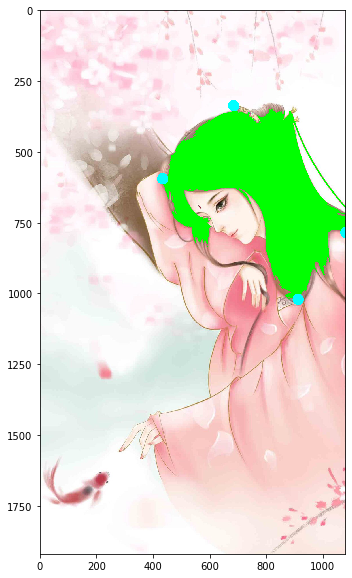

In [50]:
cnt = contours[487]
left = tuple(cnt[cnt[:, :, 0].argmin()][0])
right = tuple(cnt[cnt[:, :, 0].argmax()][0])
top = tuple(cnt[cnt[..., 1].argmin()][0])
bottom = tuple(cnt[cnt[..., 1].argmax()][0])
# load image
img = cv2.imread('./imgdata/anime.jpg')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show contour
img_ = cv2.drawContours(img_, contours, cnt_idx, [0, 255, 0], -1)
# show points
img_ = cv2.circle(img_, center=left, radius=20, color=[0, 255, 255], thickness=-1)
img_ = cv2.circle(img_, center=right, radius=20, color=[0, 255, 255], thickness=-1)
img_ = cv2.circle(img_, center=top, radius=20, color=[0, 255, 255], thickness=-1)
img_ = cv2.circle(img_, center=bottom, radius=20, color=[0, 255, 255], thickness=-1)
# show
fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_)
plt.show()

### 凸缺陷

#### cv2.convexityDefects(contour, convexhull[, convexityDefects])
+ Inputs:
    + contours:一个轮廓
    + convexhull:
    + convexityDefects:
+ Returns:
    * 返回一个数组，其中每一行的值是[起点，终点，最远的点，到最远点的近似距离]。返回结果的前三个值是轮廓点的索引，如果要使用这些轮廓点，还需要去输入contour中去寻找

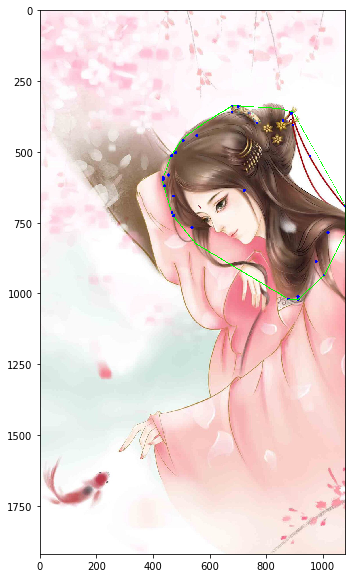

In [11]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
img_cont, contours, structure = cv2.findContours(img_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[487]

img_show = img.copy()

hull = cv2.convexHull(cnt, returnPoints=False)
defects = cv2.convexityDefects(contours[487], hull)

for i in range(defects.shape[0]):
    s, e, f, d = defects[i, 0]
    start_pnt = tuple(cnt[s][0])
    end_pnt = tuple(cnt[e][0])
    far_pnt = tuple(cnt[f][0])
    cv2.line(img_show, start_pnt, end_pnt, [0, 255, 0], 2)
    cv2.circle(img_show, far_pnt, 5, [0, 0, 255], -1)

plt.figure(figsize=[16, 10])
plt.imshow(img_show)
plt.show()

#### 求解图像中的一个点到一个对象轮廓的最短距离，如果点在轮廓外部，返回值为负值。如果在轮廓上，返回值为0.在轮廓内部，返回值为正值。

#### cv2.pointPolygonTest(contour, pt, measureDist)
+ Inputs:
    + contour:一个轮廓
    + pt:图像上一点
    + measureDist:如果设置为True，就会计算轮廓与出入的point之间的最短距离。如果设为False，只会判断这个点与轮廓之间的位置关系（返回值为+1, 0, -1）

In [17]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
img_cont, contours, structure = cv2.findContours(img_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[487]

img_show = img.copy()
random_point = np.random.randint(0, 1000, [1, 2])[0]
dist = cv2.pointPolygonTest(cnt, tuple(random_point), True)
print(dist)

-148.32734070291963


### 形状匹配

#### cv2.matchShapes(contour1, contour2, method, parameter)

cv2.matchShapes()可以帮助我们比较两个形状（轮廓）之间的相似度。如果返回值越小，匹配越好。它是根据Hu矩来计算的。[Hu矩是归一化中心矩的线性组合，之所以这样做是为了能够获取代表图像的某个特征的矩函数，这些矩函数对某些变化，如缩放、旋转、进行映射具有不变性]
+ Inputs:
    + contour1:
    + contour2:
    + method:
    + parameter:

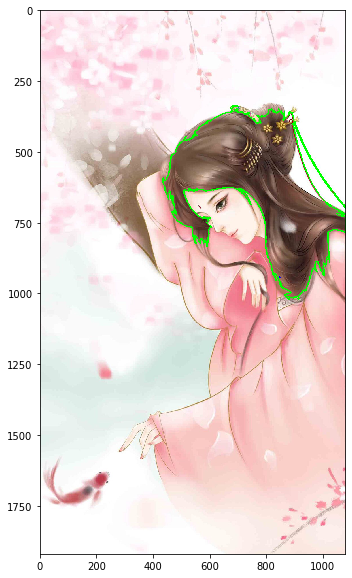

3.770814558381958


In [25]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
img_cont, contours, structure = cv2.findContours(img_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
cnt_1 = contours[487]
cnt_2 = contours[399]

img_show = img.copy()
cv2.drawContours(img_show, contours, 487, [0, 255, 0], 3)
cv2.drawContours(img_show, contours, 500, [0, 0, 255], 3)
plt.figure(figsize=[16, 10])
plt.imshow(img_show)
plt.show()

ret = cv2.matchShapes(cnt_1, cnt_2, 1, 0.)
print(ret)

### 轮廓层次

使用cv2.findContours()函数来查找轮廓，其中需要传入一个轮廓提取模式的参数，我们一般总是设为cv2.RETR_TREE或者cv2.RETR_LIST.cv2.findContours()返回的结果包含3个数组，第一个为图像，第二个为轮廓，第三个为层次结构。

查找轮廓时会出现一些轮廓位于某些轮廓的内部，这种情况下我们称外部的形状为父，内部的形状为子，按照这种分类方式，一幅图像中的所有轮廓之间就建立了父子关系。这样我们就可以确定一个轮廓与其它轮廓是怎样连接的，比如他是不是某个轮廓的子轮廓，或者父轮廓。

+ RETR_LIST:这种模式只提取轮廓不建立任何父子关系，所有提取到的轮廓都处于同一组织轮廓。（在不关心轮廓之间的关系的情况下）
+ RETR_EXTERNAL:这种模式只会返回最外边的轮廓，所有的子轮廓都会被忽略掉。（只关心最外边的轮廓）
+ RETR_CCOMP:这种模式下会返回所有的轮廓并分为两级组织结构
+ RETR_TREE:这种模式会返回所有轮廓